In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/My\ Drive/Colab\ Notebooks/

/content/drive/My Drive/Colab Notebooks


# Bangkit! Assignment 5
### Created by:
Harrianto Sunaryan  
Suparjo

## Problem Overview
**Bank Telemarketing** is a method of direct marketing in which a salesperson persuades prospective customers to buy products or services over the phone call or through a subsequent face to face. In this project we will focused on the method based on phone calls.

A lot of customers disturbed by this type of method and resulted affect the relationship between the bank and the customer, especially when they got a continuous phone call in an inappropriate situation suddenly. On the other hand, many salespeople find this method isn't useful because it consumes time with a low chance of success.

If we can predict how successfully the telemarketing method on given customers, the bank can saving time, increase the chance of success, and saving costs by reducing the number of the phone call.

## Data Set Information and Source
The data is related with direct marketing campaigns of a Portuguese banking institution with the binary target wether the customers subscribed a term deposit.

This dataset obtained from https://www.kaggle.com/sharanmk/bank-marketing-term-deposit.
with the credits goes to UCI for providing the data set in https://archive.ics.uci.edu/ml/datasets/bank+marketing# from the research of [Moro et al., 2014].

Citation:
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


# Exploratory Data Analysis
In this section, we describe the features and the target, along with the pattern or useful information underlying on them.

In [41]:
import pandas as pd

data = pd.read_csv('Data/Bangkit/bank_customer_survey.csv')
print('Numbers of Observation: ',len(data))
data.head()

Numbers of Observation:  45211


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


### Features Description
The data set contains 45211 observations and contains:  
16 features and 1 binary target (0 for failed to convice the customer and 1 for success to convice the customer).

**Features**  
age:
Numerical values represent the customer age.

job:
Categorical strings represent the customer occupation.

martial:
Categorical strings represent the customer marital status.

education:
Categorical strings represent the customer education.

default:
Categorical strings represent wether the customer has default credits or not.

balance:
Numerical values represent the customer average yearly balance in euros.

housing:
Categorical strings represent wether the customer has housing loan or not.

loan:
Categorical strings represent wether the customer has personal loan or not.

contact:
Categorical strings represent contact communication type.

day:
Numerical values represent the last contact day of the month (1-31).

month:
Categorical strings represent the last contact month of the year.

duration:
Numerical values represent last contact durations.

campaign:
Numerical values represent number of contacts performed during this campaign for this customer.

pdays:
Numerical values represent number of days passed after last contacted from a previous campaign. (-1 means the customer was not previously contacted)

previous:
Numerical values represent number of contacts performed before this campaign for this customer.

poutcome:
Categorical strings represent wether the previous campaign was success for this customer.



**Target**  
y:
Categorical strings represent wether the customer subsribed a term of deposit (this campaign).





In [42]:
#Checking data duplicated
print('Number of duplicated :',data.duplicated().value_counts(True)[0]-1)

#Checking Null and data type in each columns
data.info()

Number of duplicated : 0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [0]:
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Target
Below pie chart shows the proportion of telemarketing success. The telemarketing success percentage is **11.7%**, which means the target is **imbalanced**.

When dealing with the imbalanced target, we must consider the proportion when conducting an analysis or creating a model.

In [44]:
fig = px.pie(data,names='y', title='Proportion of subsribed a term of deposit',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### AGE
Below histogram shows the distribution of age with success and failure to be compared.

As we can see, the age can be divided into three categories (<=30,31-59,>=60). In categories <=30 and >=60, the target is dominated by success, while for groups (31-59), the failure categories are more likely to occur.

We try to convert the age feature into categorical type, after considering the graphics and it has better interpretation rather than the numerical type.

In [45]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=data.loc[data['y']==1,'age'], histnorm='probability',name='Success'))
fig.add_trace(go.Histogram(x=data.loc[data['y']==0,'age'], histnorm='probability',name='Failure'))
fig.update_layout(barmode='overlay')

fig.update_traces(opacity=0.75)
fig.show()

### Feature percentages

For each columns, we will see each value percentage by the `y`. the barplots indicate the number of occurence of that value in the data and the lineplots indicate the respective value percentage of the yes. For high cardinality or numerical columns, we will categorize them using decile.

There are some information that we can get from the plot, that are
1. May to August range of month has the lowest percentage 
2. `poutcome` or the previous campaign with a success result has a high probability that it will success again on this campaign
3. `poutcome` and `contact` with unknown value has a low percentage of success
4. The number of `duration` increases along with the percentage of subscription
5. The amount of `balance` have a similar pattern with `duration` but it has lower percentage

'poutcome' feature may give a significant impact on the `y` from the plot analysis below

In [0]:
import matplotlib.gridspec as gridspec
import numpy as np

In [0]:
data['decile_age'] = pd.qcut(data['age'], 10, labels=False)
data['decile_duration'] = pd.qcut(data['duration'], 10, labels=False)
data['decile_balance'] = pd.qcut(data['balance'], 10, labels=False)
data['month'] = data['month'].map({'jan':1,'feb':2,'mar':3,'apr':4,
                               'may':5,'jun':6,'jul':7,'aug':8,
                               'sep':9,'oct':10,'nov':11,'dec':12})

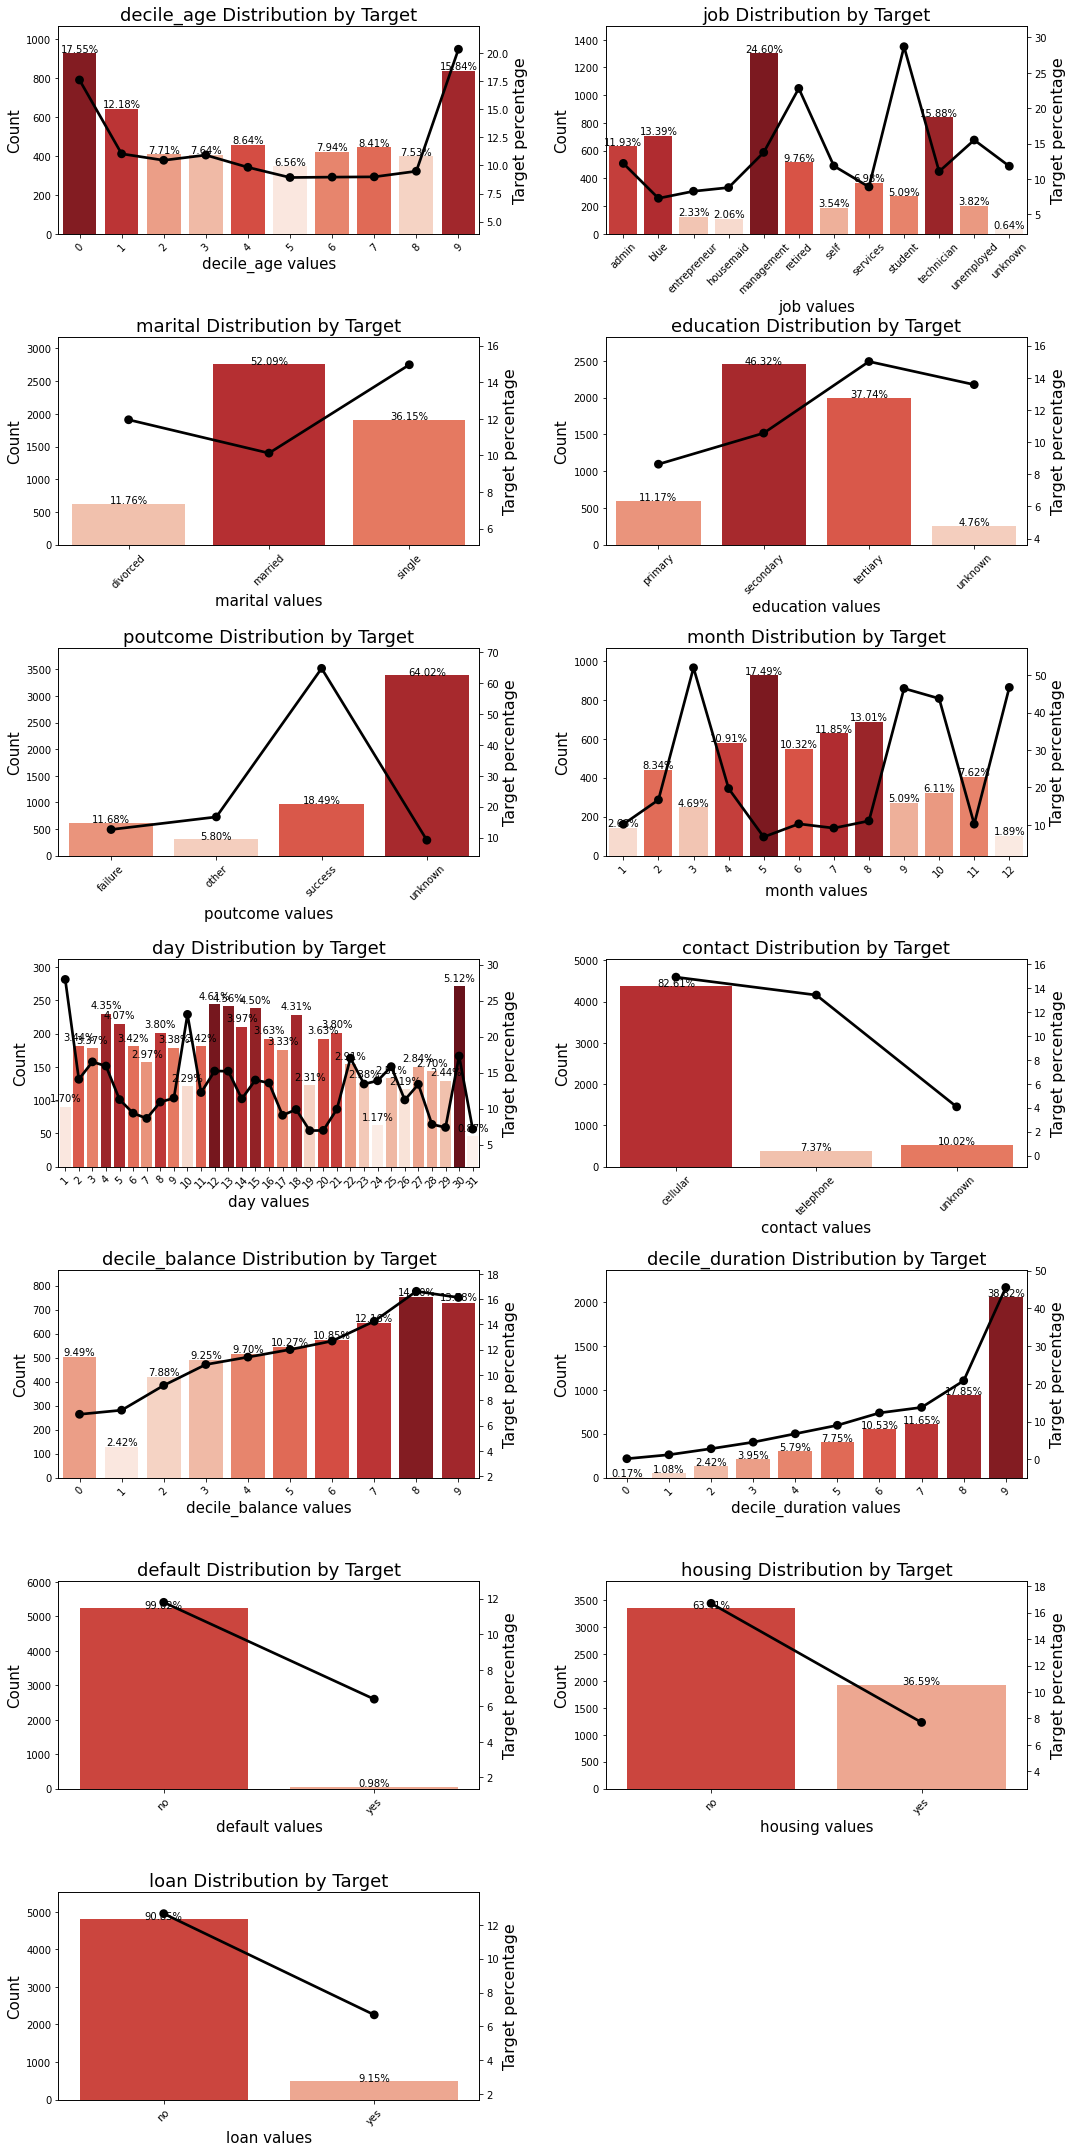

In [48]:
cols = [ 'decile_age', 'job', 'marital', 'education',
        'poutcome', 'month', 'day', 'contact',
        'decile_balance', 'decile_duration',
        'default', 'housing', 'loan']
grid = gridspec.GridSpec(7,2) 
plt.figure(figsize=(15, 30)) 

for n, col in enumerate(data[cols]): 
    tmp = pd.crosstab(data[col], data['y'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)

    ax = plt.subplot(grid[n]) 

    #barplot
    groupedvalues = data.groupby(col).sum().reset_index()
    pal = sns.color_palette("Reds_r", groupedvalues.shape[0])
    rank = groupedvalues["y"].argsort().argsort() 
    sns.barplot(x=col,y='y',data=groupedvalues, palette=np.array(pal[::-1])[rank])
    ax.set_ylabel('Count', fontsize=15) 
    ax.set_title(f'{col} Distribution by Target', fontsize=18)
    ax.set_xlabel(f'{col} values', fontsize=15) 
    plt.xticks(rotation = 45)

    #lineplot
    gt = ax.twinx()
    gt = sns.pointplot(x=col, y='Yes', data=tmp,order=list(tmp[col].values),color='black', legend=False)
    gt.set_ylim(tmp['Yes'].min()-5,tmp['Yes'].max()*1.1)
    gt.set_ylabel("Target percentage", fontsize=16)
    sizes=[] # Get highest values in y
    total = 0
    for p in ax.patches:
        total +=  p.get_height()
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 8,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights

plt.tight_layout()
plt.subplots_adjust(hspace = 0.5, wspace=.3)
plt.show()


### Time-based percentage

# Feature Engineering(?)
In this section, we will extract feature on the raw data using some data mining technique to improve the performace of the model

### Group the Age
from the previous analysis, probability trend in the subscription has the same pattern regard to each interval of the age. therefore, we will segment the age by, <br>
group 1 :  for 0< `age` <31 <br>
group 2 : for 30< `age` <59 <br>
group 3 : for 60< `age` <100 

In [48]:
data['age'] = pd.cut(data['age'], bins = [0,30,60,100], labels = [1,2,3])
data['age'] = data['age'].astype('int')
data['age'].value_counts().sort_index()

1     7030
2    36993
3     1188
Name: age, dtype: int64

### Binary-encoding
We will encode every binary-value ( yes or no ) columns with binary representative.

In [0]:
binary_col = ['default','housing','loan']
for i in range(len(binary_col)):
    data[binary_col[i]] = data[binary_col[i]].map({'no':0,'yes':1})

### One-hot encoding
 for multiple value, more than 3, columns like `job`, `marital`, `education`, `contact`, and `poutcome`, we will encode them with one-hot encoding technique. 

In [0]:
#one hot encoding
col = ['job','marital','education','contact','poutcome']
for i in range(5):
    data = pd.concat([data.drop(col[i], axis = 1),pd.get_dummies(data[col[i]])], axis = 1)